<a href="https://colab.research.google.com/github/Samyadel123/sign-language-project-/blob/main/sign_language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

upload you kaggle api

In [21]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"samyadel","key":"e6108628fcbf2a414a1144326b776159"}'}

In [22]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

downloding the dataset

In [23]:
!kaggle datasets download risangbaskoro/wlasl-processed

Dataset URL: https://www.kaggle.com/datasets/risangbaskoro/wlasl-processed
License(s): other
wlasl-processed.zip: Skipping, found more recently modified local copy (use --force to force download)


In [24]:
!unzip /content/wlasl-processed.zip

Archive:  /content/wlasl-processed.zip
replace WLASL_v0.3.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [25]:
def loud_json(file_name:str):
  import json
  with open(file_name,"r") as f:
    data = json.load(f)
  return data

code to see the vido

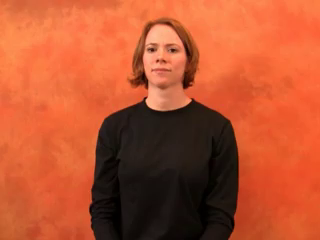

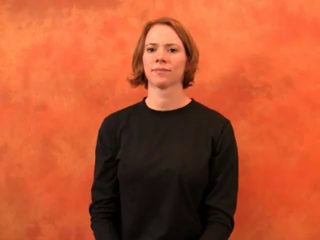

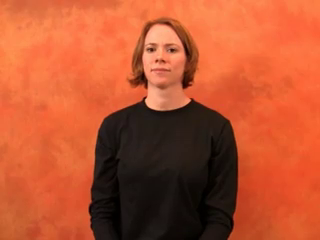

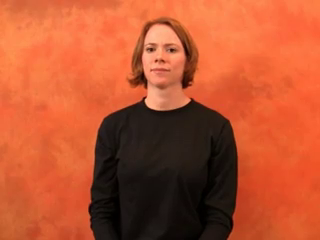

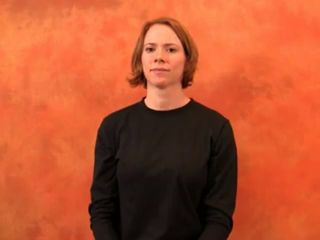

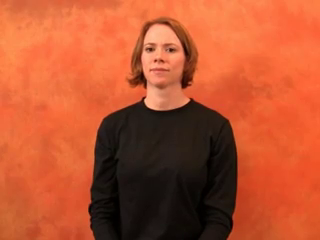

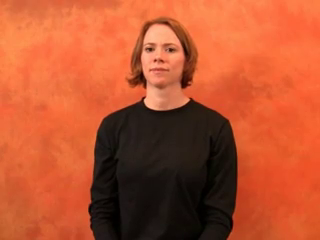

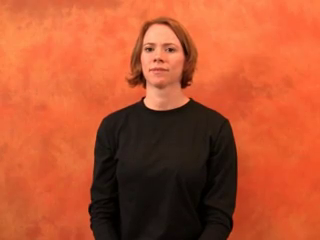

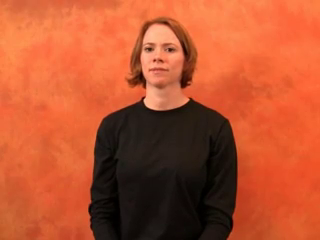

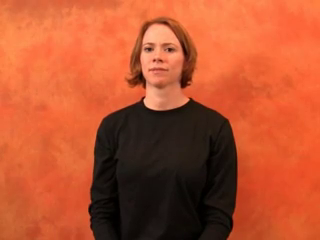

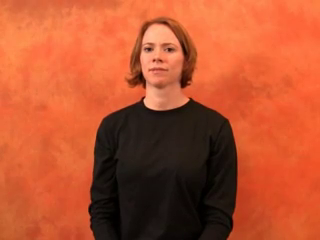

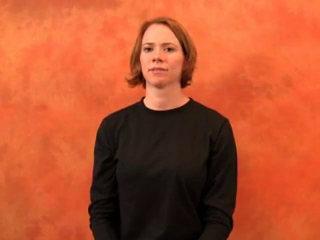

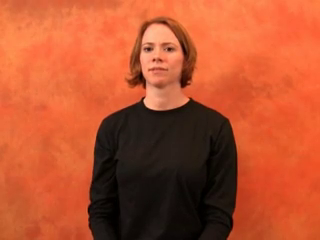

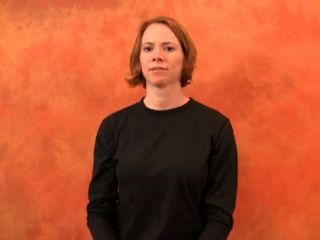

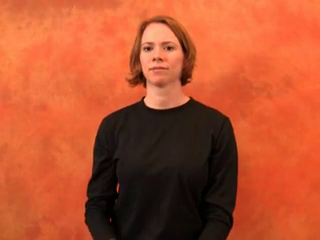

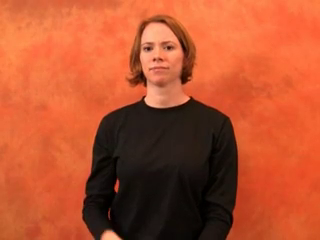

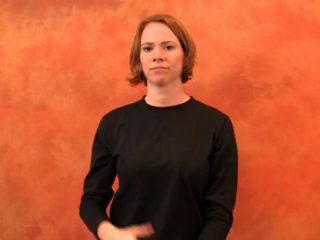

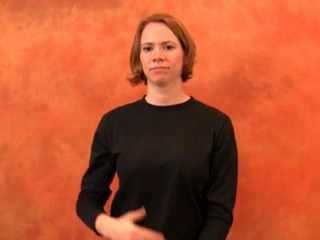

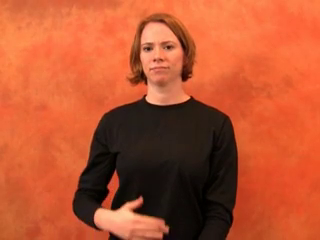

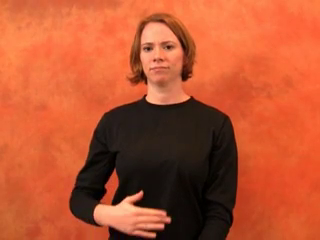

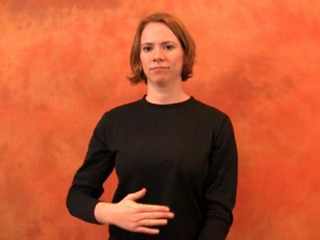

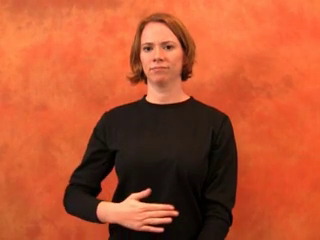

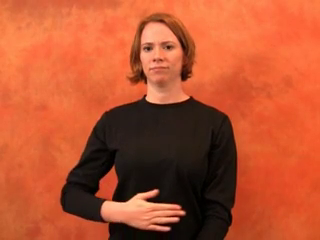

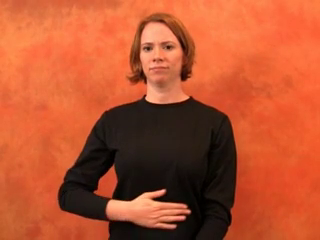

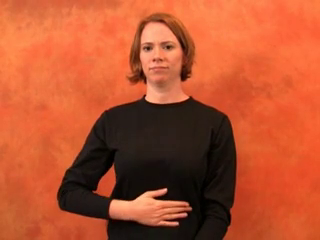

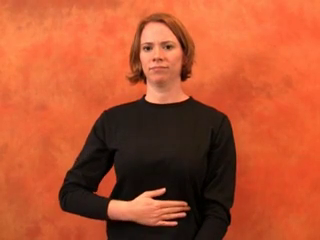

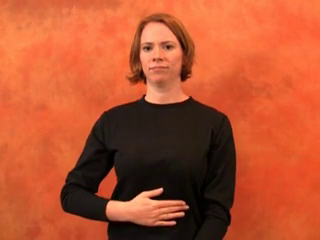

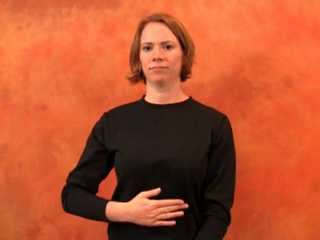

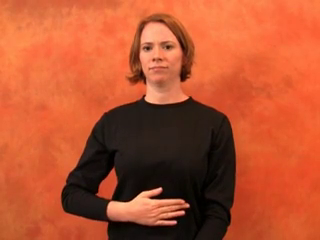

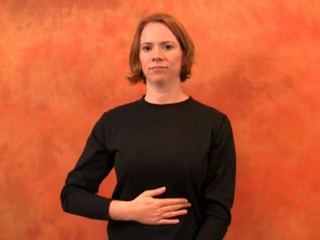

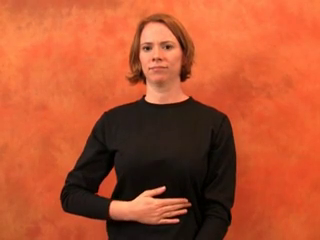

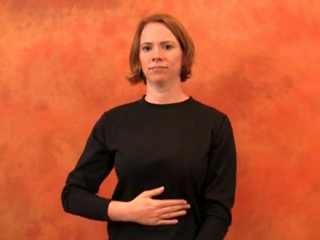

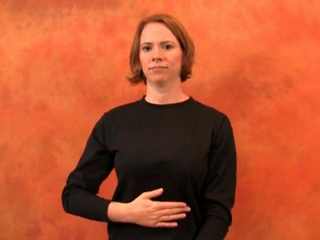

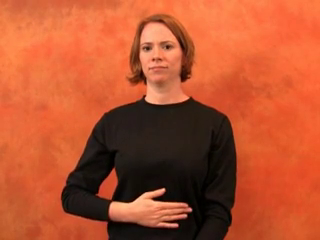

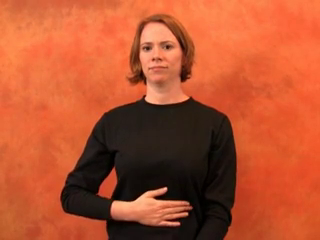

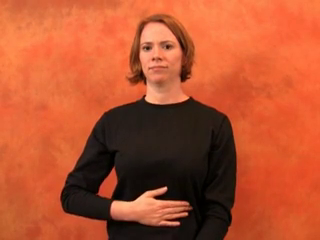

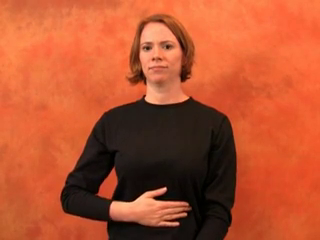

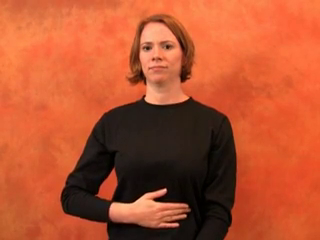

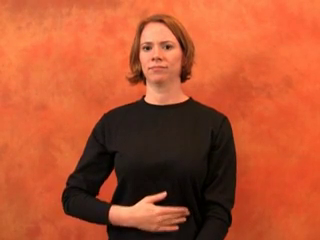

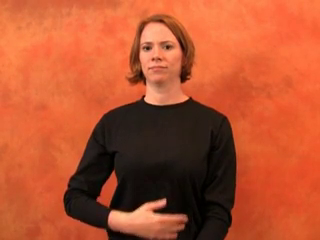

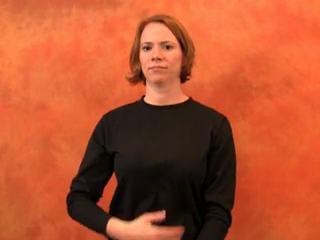

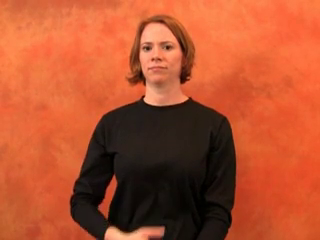

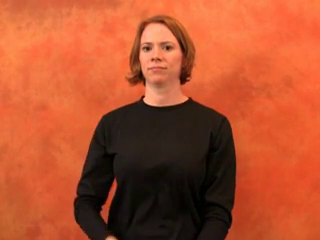

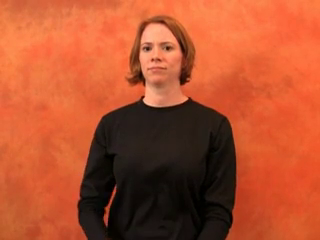

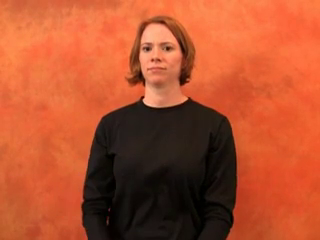

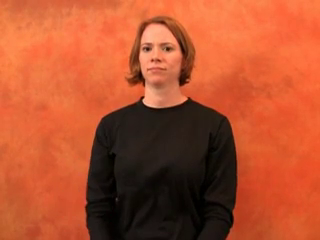

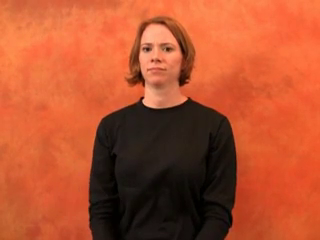

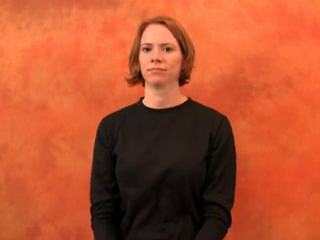

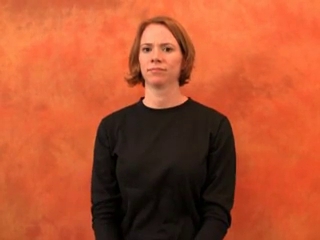

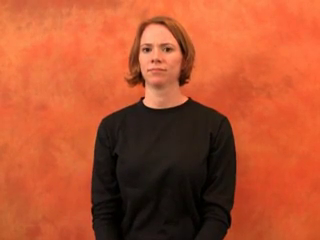

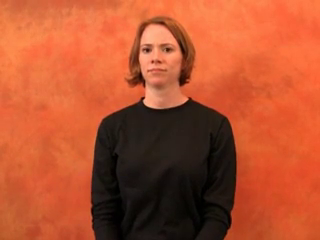

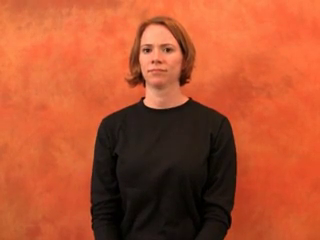

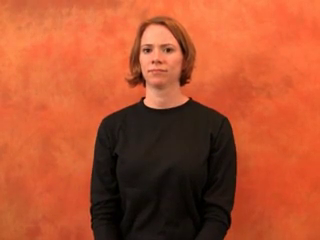

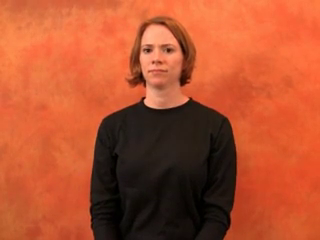

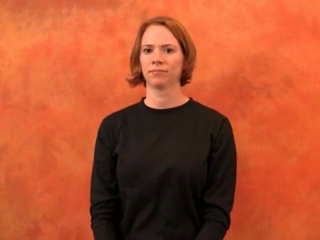

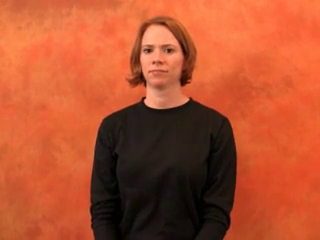

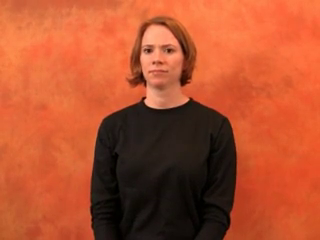

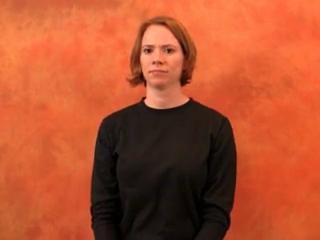

Video playback finished.


In [7]:
import cv2
import time
# Import the Colab-specific display function and utility for clearing output
from google.colab.patches import cv2_imshow
from IPython.display import clear_output

# Set the path to your video file
video_path = "/content/videos/00335.mp4"

# Open the video file
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print(f"Error: Could not open video file at {video_path}")
else:
    # Get the original FPS for a smoother display (optional but recommended)
    fps = cap.get(cv2.CAP_PROP_FPS)
    if fps > 0:
        delay = 1 / fps
    else:
        delay = 0.033 # Default to ~30 FPS if not found

    # Loop through the video frames
    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            # If the frame was not read successfully, break the loop
            break

        # 1. Display the frame using the Colab-specific function
        cv2_imshow(frame)

        # 2. Clear the previous output cell to simulate video
        # The 'wait=True' ensures a smooth transition
        #clear_output(wait=True)

        # Optional: Add a small sleep to regulate frame rate (improves playback quality)
        time.sleep(delay)

    # Release the VideoCapture object
    cap.release()
    print("Video playback finished.")

# Note: cv2.destroyAllWindows() is NOT needed in Colab.

In [26]:
!git clone https://github.com/AssemblyAI-Examples/mediapipe-python.git
!pip install mediapipe
!pip install PyQt5
!pip install ipython==7.32.0

fatal: destination path 'mediapipe-python' already exists and is not an empty directory.
  Using cached PyQt5-5.15.11-cp38-abi3-manylinux_2_17_x86_64.whl.metadata (2.1 kB)
  Using cached PyQt5_sip-12.17.0-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.whl.metadata (472 bytes)
  Using cached PyQt5_Qt5-5.15.17-py3-none-manylinux2014_x86_64.whl.metadata (536 bytes)
Using cached PyQt5-5.15.11-cp38-abi3-manylinux_2_17_x86_64.whl (8.2 MB)
Using cached PyQt5_Qt5-5.15.17-py3-none-manylinux2014_x86_64.whl (61.1 MB)
Using cached PyQt5_sip-12.17.0-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.whl (281 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.9/793.9 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.8 MB/s eta 0:00:00
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account al

In [1]:
import mediapipe as mp
def mediapip_dedection(fram,model):
  fram = cv2.cvtColor(fram,cv2.COLOR_BGR2RGB) # color conversion for mediapipe
  fram.flags.writeable = False
  results = model.process(fram)
  fram.flags.writeable = True
  fram = cv2.cvtColor(fram,cv2.COLOR_RGB2BGR)
  return fram,results

mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils



In [ ]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    return image

In [2]:
def draw_stayled_landmarks(image,results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,22,10),thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,44,121),thickness=1,circle_radius=1)
                              )
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(121,22,76),thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(121,44,250),thickness=1,circle_radius=1)
                              )
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66),thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(245,66,230),thickness=1,circle_radius=1)
                              )
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1)
                            )

    return image

In [ ]:
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
  cap = cv2.VideoCapture("/content/videos/00335.mp4")
  while cap.isOpened():
    ret,frame = cap.read()
    if not ret:
      break
    # make dedection
    image, result = mediapip_dedection(frame,holistic)

    # draw landmarks
    image = draw_stayled_landmarks(image,result)
    cv2_imshow(image)
    #
    if cv2.waitKey(10) & 0xFF == ord('q'):
      break

  cap.release()
  cv2.destroyAllWindows()

now i know that the result landmark has four things
- pos landmark
- left-hand landmark
- right-hand landmark
- face landmarks

for example pos landmark is a list for each fram in the vedio

and each one has four componats (x,y,z,visabilty)

In [ ]:
result.pose_landmarks.landmark[0]

In [ ]:
result.face_landmarks.landmark[0]

extract medipipe points in one fram using this function

In [3]:
import numpy as np
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])


In [1]:
import cv2

def extract_frame_sequence(video_path, start_frame, end_frame, output_prefix="frame",base_path='/content'):
    """
    Extracts a sequence of frames from a video using OpenCV.

    Args:
        video_path (str): Path to the video file.
        start_frame (int): The index of the starting frame (inclusive).
        end_frame (int): The index of the ending frame (inclusive).
        output_prefix (str): Prefix for the saved frame filenames.
    """
    # 1. Open the video
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"Error: Could not open video file {video_path}")
        return

    if end_frame == -1:
      end_frame = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) - 1

    # Check if the end frame is before the start frame
    if end_frame < start_frame:
        print("Error: End frame cannot be less than the start frame.")
        cap.release()
        return

    # Get the total number of frames in the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Total frames in video: {total_frames}")

    # Check if frame numbers are within bounds
    if end_frame >= total_frames:
        print(f"Warning: End frame {end_frame} is beyond the total frames. Setting end_frame to {total_frames - 1}")
        end_frame = total_frames - 1

    # 2. Set the Start Frame
    # cv2.CAP_PROP_POS_FRAMES is the 0-based index of the frame to be decoded/captured next.
    cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
    current_frame_index = start_frame
    frame_count = 0

    print(f"Starting extraction from frame {start_frame} to {end_frame}...")

    # 3. Loop and Read
    while cap.isOpened() and current_frame_index <= end_frame:
        # Read the next frame
        ret, frame = cap.read()

        if ret:
            # 4. Save/Process the frame
            # Example: Save the frame as a PNG file
            filename = f"{output_prefix}_{current_frame_index:05d}.png"
            filename = os.path.join(base_path,filename)
            cv2.imwrite(filename, frame)

            frame_count += 1
            current_frame_index += 1
        else:
            # Break the loop if we can't read the next frame
            print(f"Warning: Could not read frame at index {current_frame_index}. Stopping.")
            break

    # Release the video capture object
    cap.release()
    print(f"Extraction complete. {frame_count} frames saved.")



let's make an experiment

load the config file and get a test exampe to work with

In [13]:
import os

data = loud_json("/content/WLASL_v0.3.json")
one = data[0]
# lable / gloss
gloss = one["gloss"]
# instances
instances = one["instances"]

# get the first vido in the first sample
video_id = instances[0]["video_id"]
frame_start = instances[0]["frame_start"]
frame_end = instances[0]["frame_end"]

# constract vido path
video_path = os.path.join("/content/videos",f"{video_id}.mp4")

output_prefix = gloss

extract_frame_sequence(video_path,frame_start,frame_end,output_prefix,base_path='')

Total frames in video: 75
Starting extraction from frame 1 to 74...
Extraction complete. 74 frames saved.


extract the frams i need

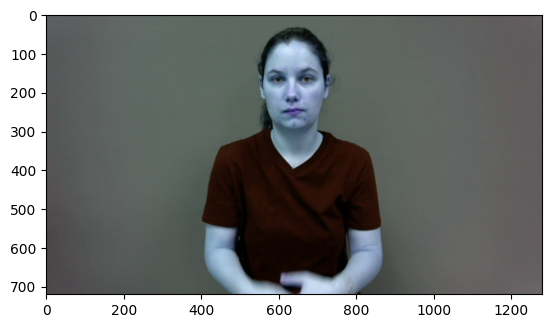

In [20]:
# see a sample frame
import cv2
import matplotlib.pyplot as plt
sample_imge = "/content/book_00049.png"
# display image
img = cv2.imread(sample_imge)
plt.imshow(img)
plt.show()

now that we have tested our extraction function now we should setup our folder structer

it will be very simple we will make a root volder called MyData

then we will loud the class list and make a folder with the folder name equal to a class

within each class will make a folde wih the vido id

and log our exraction in this folder

In [ ]:
# folder strucre
import os
import shutil
# make my data folder
os.makedirs("/content/MyData",exist_ok=True)
# load class list
with open("/content/wlasl_class_list.txt","r") as f:
  class_list = f.read()

# make a folder with each class name
for class_name in class_list.split("\n"):
  os.makedirs(os.path.join("/content/MyData",class_name),exist_ok=True)

#